## 계층적 군집
#### <img src='../img/hierarchy.png' width='85%'>
- 군집트리, 덴드로그램을 생성하여
- 다양한 데이터를 그룹화

- 비슷한 군집끼리 묶어 가면서 최종적으로
- 하나의 군집단으로 묶는 기법
- 즉, 군집간의 거리를 기반으로 군집화하는 방식으로
- 기존의 군집기법(kmeans)에 비해 군집수를 지정x

- 계층적 군집 => 응집형, 분리형
- 응집형 : 개별데이터 군집 => 군집단 형성
- 분리형 : 데이터 전체를 하나의 군집 => 세부적으로 여러 군집으로 나눔

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler, LabelEncoder

from sklearn.model_selection import train_test_split, cross_val_score

from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression

from sklearn.neighbors import KNeighborsClassifier

from sklearn.metrics import accuracy_score, recall_score, precision_score
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import mean_squared_error, r2_score

from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

In [3]:
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import dendrogram, linkage, fcluster

## 응집형 군집 예시

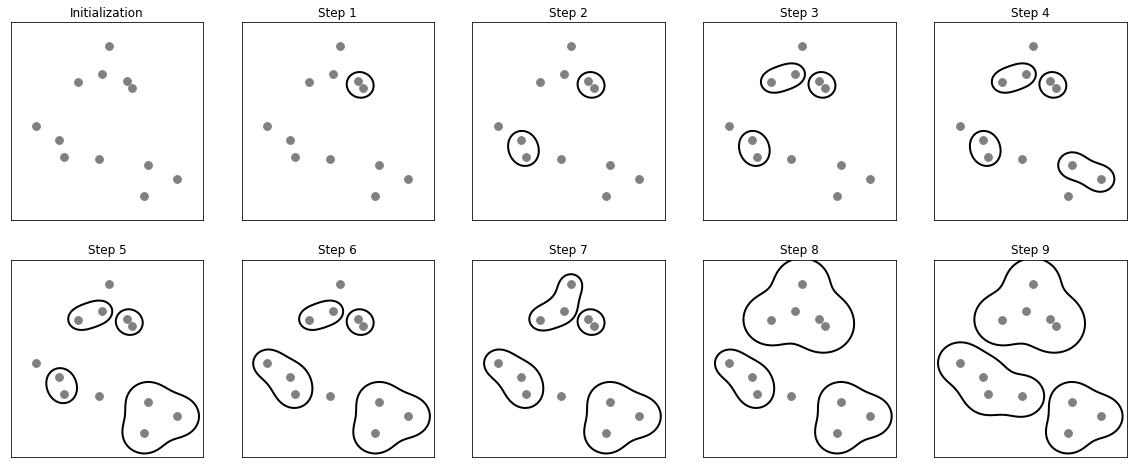

In [4]:
import mglearn
mglearn.plots.plot_agglomerative_algorithm()

## 덴드로그램 시각화
* 각 개체들이 결합되는 순서를 나타내는 트리형태의 다이어그램
#### <img src='../img/linkage.png' width='75%'>
#### <img src='../img/dendrogram.png' width='75%'>

- linkage 함수의 method 속성으로 각 군집간의 연결방식을 지정 
    - single/average/complete/centeroid/ward
    - 최단단일single    : 각 군집을 대상으로 최소거리 기준 (가까운것부터 군집)
    - 평균평균average   : 각 군집을 대상으로 평균거리 기준
    - 최장연결complete  : 각 군집을 대상으로 최대거리 기준 (먼것부터 군집)
    - 중심연결centeroid : 각 군집내 중심점 기준
    - 와드연결ward      : 군집간 SSW(응집도), SSB(분리도)간의 차이를 이용

In [5]:
X = np.array([ [5,3], [10,5], [15,12],
               [24,10], [30,30], [85,70],
               [71,80], [60,78], [70,55],
               [80,91] ])

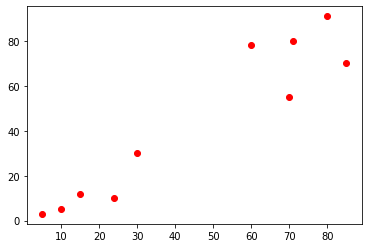

In [6]:
plt.plot(X[:, 0], X[:, 1], 'ro' )

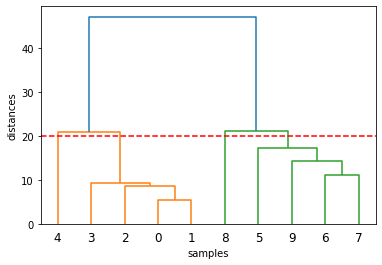

In [29]:
# 거리계산방식 지정
linked = linkage(X, method='single')

# 덴드로그램 시각화
# dendrogram(연결방식, 옵션)
dendrogram(linked, 
           orientation='top', 
#           labels=range(1,11), 
           show_leaf_counts=True)

plt.xlabel('samples')
plt.ylabel('distances')
plt.axhline(20, color='red', linestyle='dashed')
plt.show()

## 적절한 군집수 알아보기
- 덴드로그램을 보고 n개의 군집을 나눌려고 할때 적절한 distance는 어떻게 알아볼까?
- 덴드로그램에서 밑에서 위로 올라갈수록 군집을 의미하는 선의 갯수가 줄어둠 (응집형 군집!)
- scipy에서는 fcluster함수를 이용해서 distance가 특정값일때 군집정보를 알려줌
    - fcluster(연결방식, 거리, 거리측정방식)



In [8]:
# 군집간 거리가 20일때 군집의 수는?
clusters = fcluster(linked, 20, criterion='distance')

print( clusters )
print( np.unique(clusters) ) # 중복 제거
np.count_nonzero( np.unique(clusters) ) 

[1 1 1 1 2 3 3 3 4 3]
[1 2 3 4]


4

In [9]:
# 군집간 거리가 30일때 군집의 수는?
clusters = fcluster(linked, 30, criterion='distance')

print( clusters )
print( np.unique(clusters) ) # 중복 제거
np.count_nonzero( np.unique(clusters) ) 

[1 1 1 1 1 2 2 2 2 2]
[1 2]


2

# iris

In [10]:
from sklearn.datasets import load_iris

iris = load_iris()
data = iris.data
target = iris.target

In [11]:
xiris = pd.DataFrame(iris.data, columns=iris.feature_names)

yiris = pd.DataFrame(iris.target, columns=['class'])

In [12]:
## 각 군집별 연결방식에 따른 결과 시각화
linked = linkage(xiris, method='average')
# linked = linkage(xiris, method='ward')
# linked = linkage(xiris, method='complete')

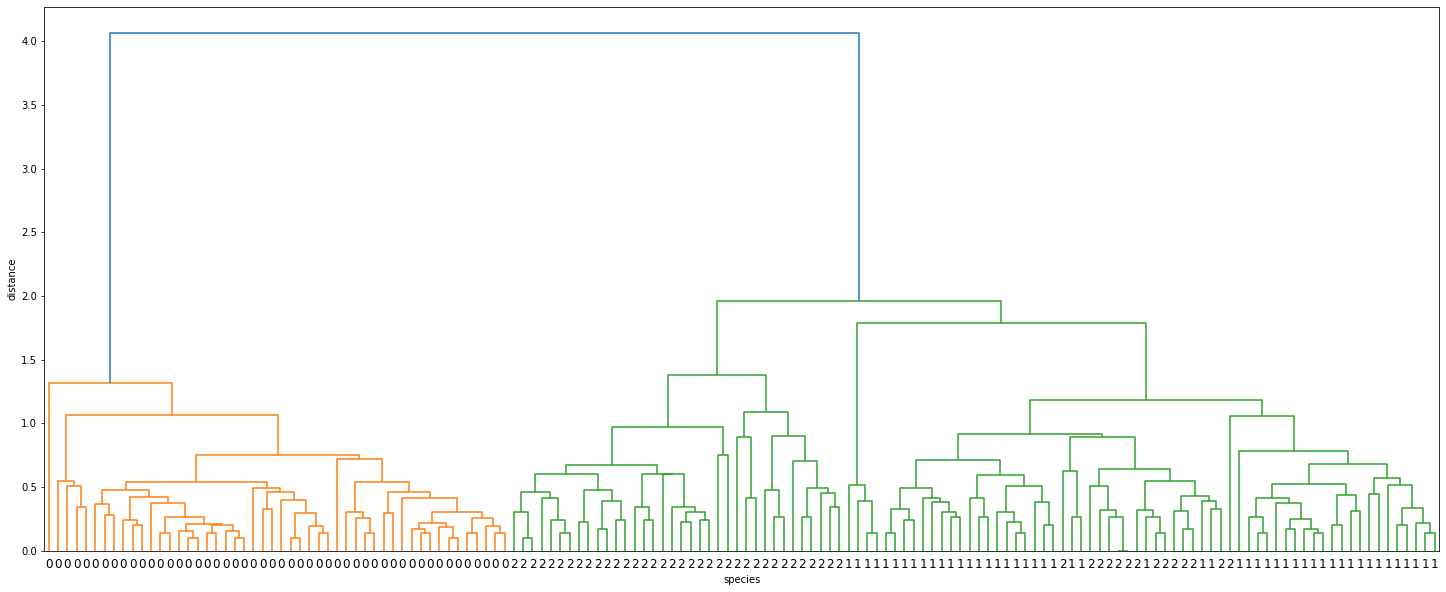

In [13]:
plt.figure(figsize=(25,10))
dendrogram(linked, leaf_font_size=12, 
           labels=target, leaf_rotation=0 )
plt.xlabel('species')
plt.ylabel('distance')
plt.show()


In [14]:
# 3개의 군집으로 나눌때 적절한 거리는?
cls = fcluster(linked, 1.96, criterion='distance')
np.count_nonzero(np.unique(cls))

3

## iris 데이터를 이용한 응집형 군집
- AgglomerativeClustering(군집수, 거리계산법, 연결방식)

In [15]:
groups = AgglomerativeClustering(
    n_clusters=3, affinity='euclidean', linkage='ward')

groups.fit(iris.data)

AgglomerativeClustering(n_clusters=3)

In [16]:
# 결과 확인
groups.labels_

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 2, 2, 2, 2, 0, 2, 2, 2,
       2, 2, 2, 0, 0, 2, 2, 2, 2, 0, 2, 0, 2, 0, 2, 2, 0, 0, 2, 2, 2, 2,
       2, 0, 0, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 0])

In [17]:
# 실루엣 계수
silhouette_score(iris.data[:, [0,1]], groups.labels_)

0.3576978019804449

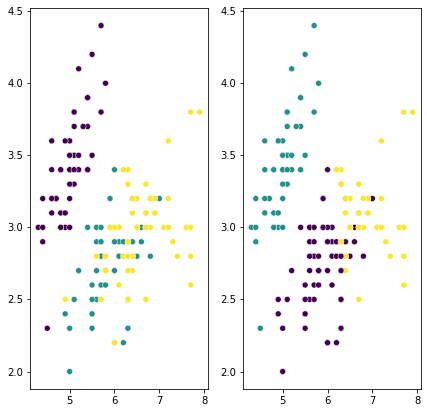

In [18]:
# sepal Length/width
plt.figure(figsize=(7,7))
plt.subplot(1,2,1)
sns.scatterplot(x=iris.data[:, 0], y=iris.data[:, 1], c=target)

plt.subplot(1,2,2)
sns.scatterplot(x=iris.data[:, 0], y=iris.data[:, 1], c=groups.labels_)
plt.show()
